# Task 5: LEARNING CROWD DYNAMICS

This notebook deals with Task 5 of Exercise Sheet 5

## PART 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from models.time_delay import TimeDelayEmbedding
from models.approximator import RBFApproximator


In [2]:
#Load the data
data = np.loadtxt("../data/MI_timesteps.txt") 

In [3]:
print(f"Data shape: {data.shape}")
print(f"First few rows:\n{data[:5]}")

Data shape: (15001, 10)
First few rows:
[[ 1. 36.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 2. 36.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 3. 43.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 4. 49.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 5. 59.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [4]:
#Burn in first 1000 steps
data = data[1000:]

In [5]:
print(f"Data shape: {data.shape}")
print(f"First few rows:\n{data[:5]}")

Data shape: (14001, 10)
First few rows:
[[1.001e+03 0.000e+00 2.000e+00 9.700e+01 7.000e+00 0.000e+00 0.000e+00
  5.000e+00 1.000e+00 4.300e+01]
 [1.002e+03 0.000e+00 2.000e+00 9.600e+01 7.000e+00 0.000e+00 0.000e+00
  5.000e+00 1.000e+00 4.500e+01]
 [1.003e+03 0.000e+00 2.000e+00 9.500e+01 6.000e+00 0.000e+00 0.000e+00
  5.000e+00 0.000e+00 4.600e+01]
 [1.004e+03 0.000e+00 2.000e+00 9.400e+01 6.000e+00 0.000e+00 0.000e+00
  4.000e+00 1.000e+00 4.600e+01]
 [1.005e+03 0.000e+00 2.000e+00 9.200e+01 6.000e+00 0.000e+00 0.000e+00
  5.000e+00 0.000e+00 4.600e+01]]


In [6]:
#Take the first 3 measurement areas
observations = data[:, 1:4]  # shape: (N, 3)

Data shape: (14001, 3)
First few rows:
[[ 0.  2. 97.]
 [ 0.  2. 96.]
 [ 0.  2. 95.]
 [ 0.  2. 94.]
 [ 0.  2. 92.]]
last few rows:
[[ 0.  2. 97.]
 [ 0.  2. 96.]
 [ 0.  2. 95.]
 ...
 [ 0. 10. 97.]
 [ 0. 10. 96.]
 [ 0. 10. 96.]]


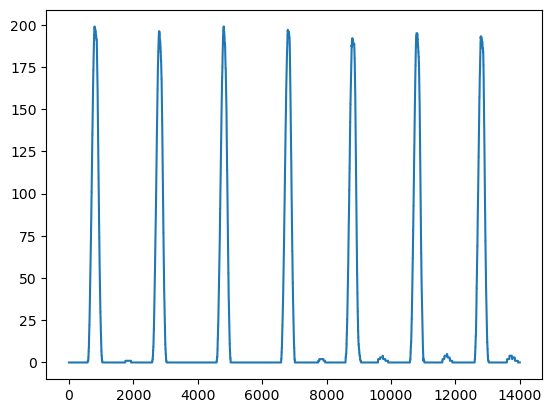

In [7]:
print(f"Data shape: {observations.shape}")
print(f"First few rows:\n{observations[:5]}")
print(f"last few rows:\n{observations[:-5]}")
plt.plot(observations[:, 0])

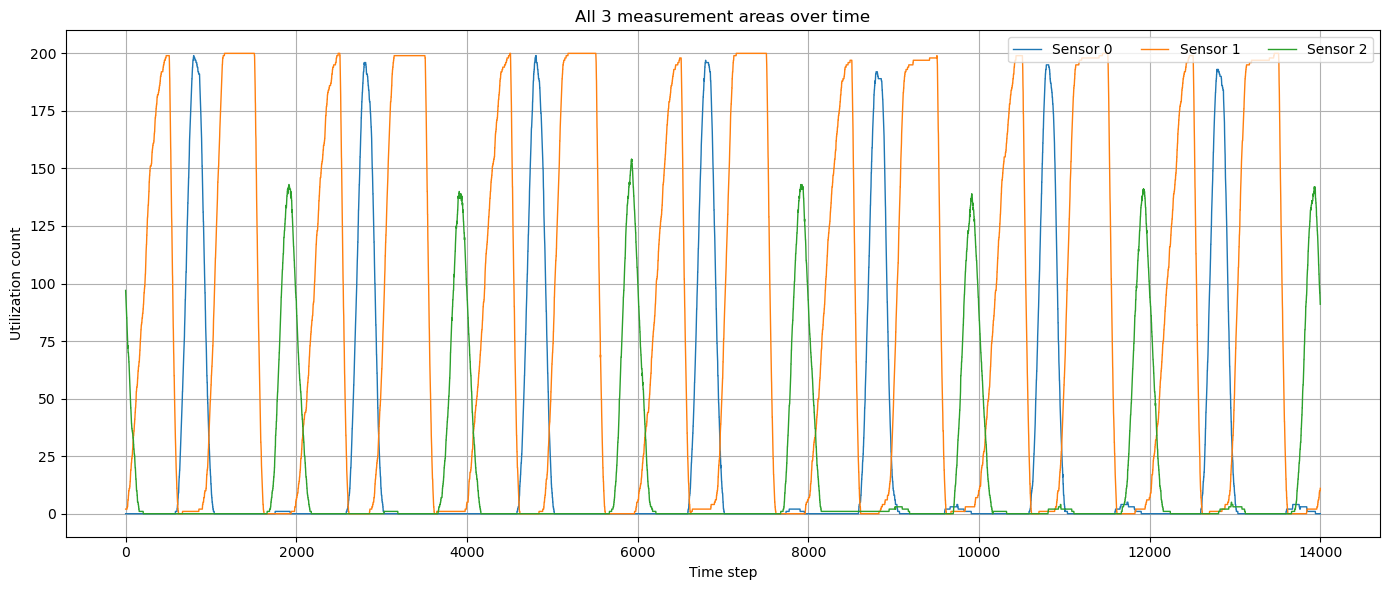

In [8]:
plt.figure(figsize=(14, 6))

for i in range(0, 3):  # Columns 1, 2, 3 (skipping time column 0)
    plt.plot(observations[:, i], label=f"Sensor {i}", linewidth=1)

plt.xlabel("Time step")
plt.ylabel("Utilization count")
plt.title("All 3 measurement areas over time")
plt.legend(loc="upper right", ncol=3)
plt.grid(True)
plt.tight_layout()
plt.show()


In [9]:
#Create Time-delay embedding (350 delay)
embedding = TimeDelayEmbedding(time_delay=np.arange(1, 351))
embedded = embedding.transform(observations)  # shape: (M, 1053)

In [10]:
print(f"embedded shape: {embedded.shape}")
print(f"First few rows:\n{embedded[:5]}")
print(f"last few rows:\n{embedded[:-5]}")


embedded shape: (13651, 1053)
First few rows:
[[ 0.  2. 97. ...  0.  2. 97.]
 [ 0.  2. 96. ...  0.  2. 96.]
 [ 0.  2. 95. ...  0.  2. 95.]
 [ 0.  2. 94. ...  0.  2. 94.]
 [ 0.  2. 92. ...  0.  2. 92.]]
last few rows:
[[ 0.  2. 97. ...  0.  2. 97.]
 [ 0.  2. 96. ...  0.  2. 96.]
 [ 0.  2. 95. ...  0.  2. 95.]
 ...
 [ 2.  0.  0. ...  2.  0.  0.]
 [ 2.  0.  0. ...  2.  0.  0.]
 [ 2.  0.  0. ...  2.  0.  0.]]


In [11]:
#Apply PCA to reduce the dimensionality of the delay-embedded vectors
pca = PCA()
embedded_pca = pca.fit_transform(embedded)

In [12]:


explained_variance_ratio = pca.explained_variance_ratio_
cumulative = np.cumsum(explained_variance_ratio)
#Determine how many dimensions are needed to preserve 95% of the variance
dim_needed = np.searchsorted(cumulative, 0.95) + 1
#Print results
print(f"Original embedding shape: {embedded.shape}")
print(f"Number of PCA components needed to preserve 95% variance: {dim_needed}")


Original embedding shape: (13651, 1053)
Number of PCA components needed to preserve 95% variance: 6


In [13]:
#Apply PCA to reduce the dimensionality of the delay-embedded vectors
pca = PCA(n_components=6)
embedded_pca = pca.fit_transform(embedded)

In [14]:
embedded_pca.shape

(13651, 6)

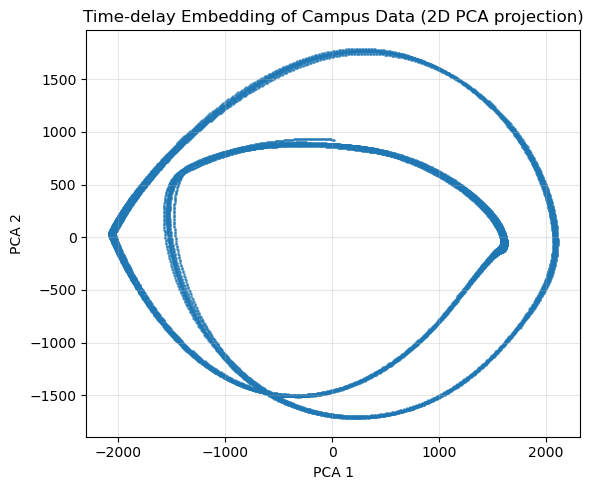

In [15]:
#Visualize the first two principal components in 2D space
plt.figure(figsize=(6, 5))
plt.scatter(embedded_pca[:, 0], embedded_pca[:, 1], s=1, alpha=0.6)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Time-delay Embedding of Campus Data (2D PCA projection)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

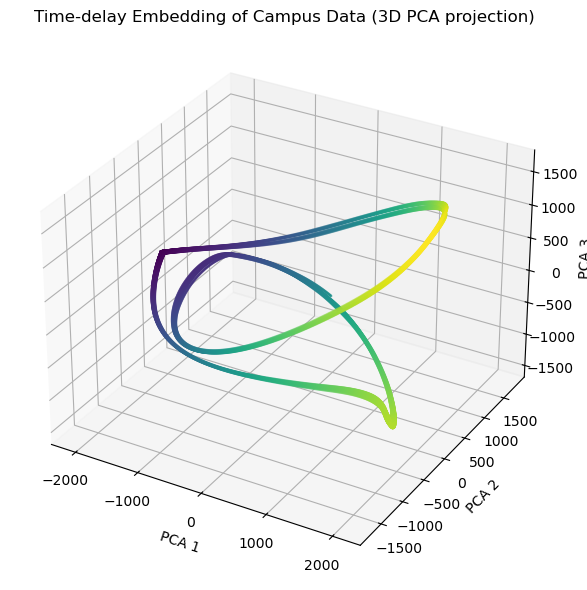

In [16]:
# Visualize the first three principal components in 3D space
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    embedded_pca[:, 0],  # PCA 1
    embedded_pca[:, 1],  # PCA 2
    embedded_pca[:, 2],  # PCA 3
    s=1, alpha=0.6, c=embedded_pca[:, 0], cmap='viridis'
)

ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
ax.set_title("Time-delay Embedding of Campus Data (3D PCA projection)")
plt.tight_layout()
plt.show()

## PART 2

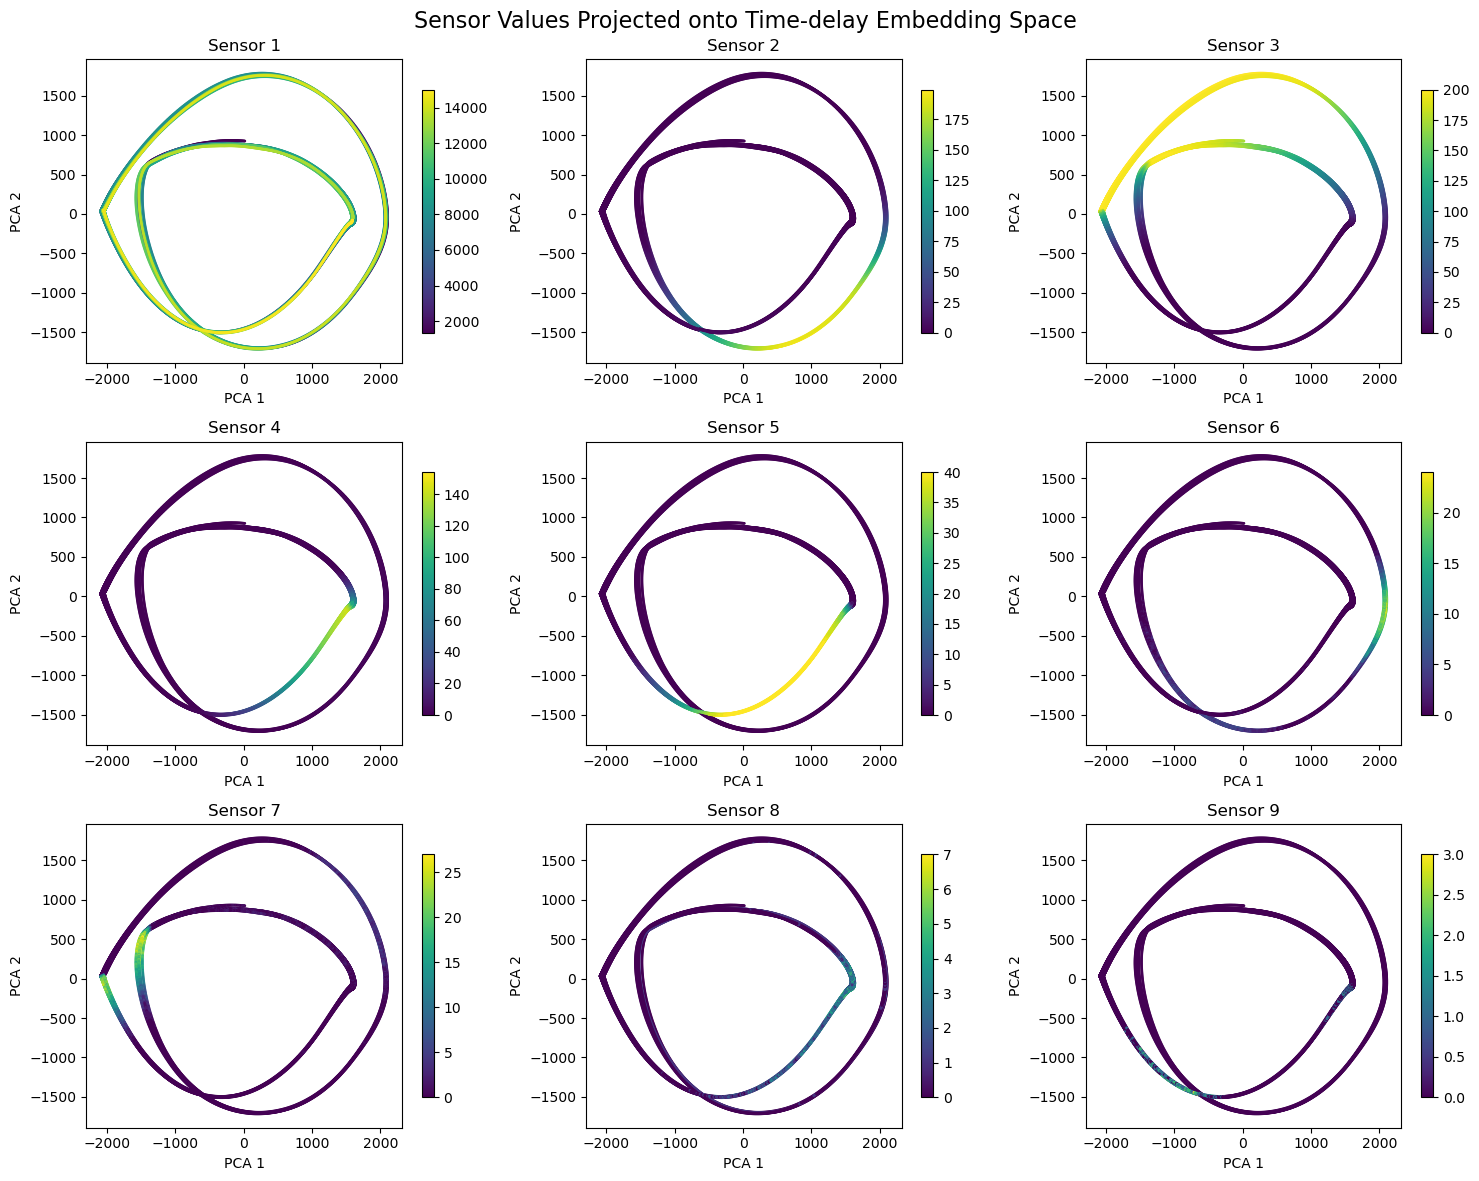

In [17]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

for i in range(9):
    ax = axes[i // 3, i % 3]
    sc = ax.scatter(embedded_pca[:, 0], embedded_pca[:, 1], s=1,
                    c=data[350:, i], cmap='viridis')  # <-- düzeltme burada
    ax.set_title(f"Sensor {i+1}")
    ax.set_xlabel("PCA 1")
    ax.set_ylabel("PCA 2")
    fig.colorbar(sc, ax=ax, shrink=0.8)

plt.suptitle("Sensor Values Projected onto Time-delay Embedding Space", fontsize=16)
plt.tight_layout()
plt.show()


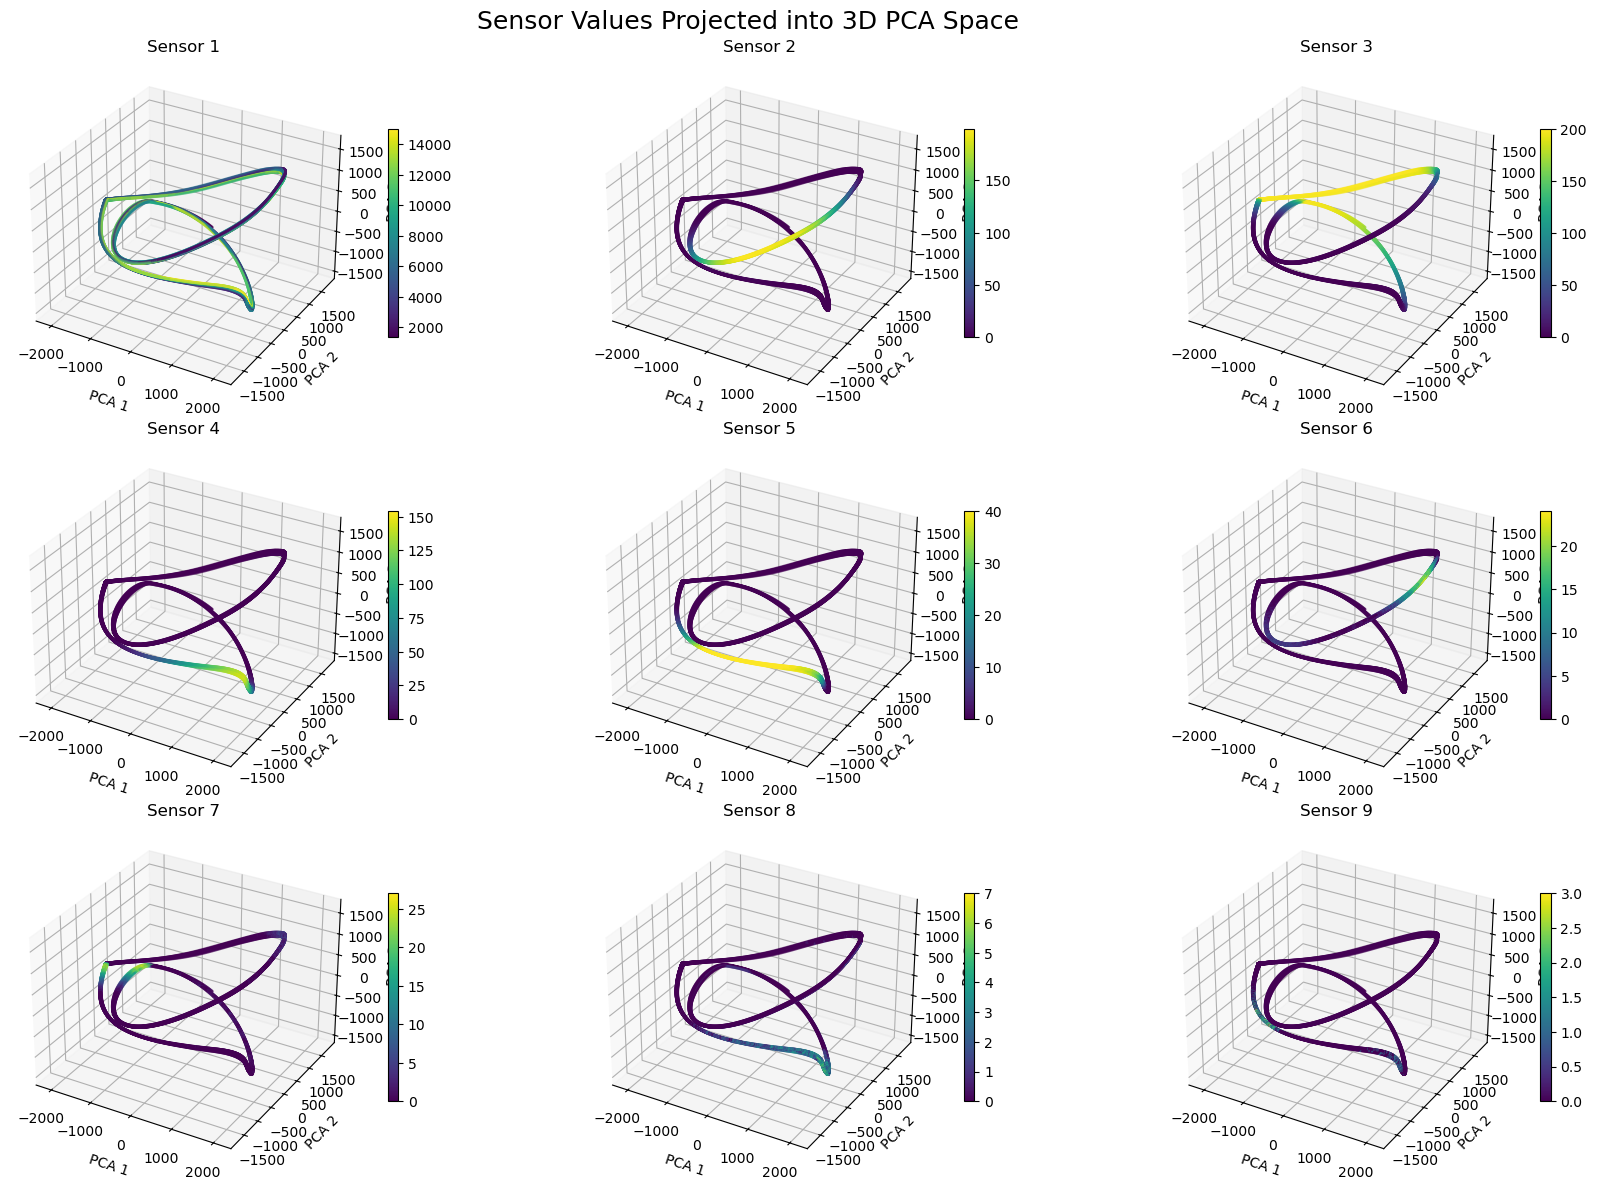

In [18]:
fig = plt.figure(figsize=(18, 12))

for i in range(9):
    ax = fig.add_subplot(3, 3, i + 1, projection='3d')
    sc = ax.scatter(
        embedded_pca[:, 0],  # PCA 1
        embedded_pca[:, 1],  # PCA 2
        embedded_pca[:, 2],  # PCA 3
        c=data[350:, i],     # Sensor i
        cmap='viridis',
        s=1
    )
    ax.set_title(f"Sensor {i+1}")
    ax.set_xlabel("PCA 1")
    ax.set_ylabel("PCA 2")
    ax.set_zlabel("PCA 3")
    fig.colorbar(sc, ax=ax, shrink=0.6)

plt.suptitle("Sensor Values Projected into 3D PCA Space", fontsize=18)
plt.tight_layout()
plt.show()

## PART 3

In [19]:
one_cycle_len = 2000  # Number of time steps in one full day
embedded_cycle = embedded_pca[:one_cycle_len, :2]  # Take only the first day's PCA embedding (first 2 components)


In [20]:
# Compute pairwise differences between consecutive points in the PCA embedding
diffs = np.diff(embedded_cycle, axis=0)

# Compute Euclidean distance between each consecutive pair 
distances = np.linalg.norm(diffs, axis=1)

# Initialize arclength array and compute cumulative arclength along the trajectory
arclength = np.zeros(len(embedded_cycle))
arclength[1:] = np.cumsum(distances)

# Normalize the arclength to the range [0, 2π] so that it fits one full periodic cycle
arclength_normalized = (arclength - arclength.min()) / (arclength.max() - arclength.min()) * (2 * np.pi)


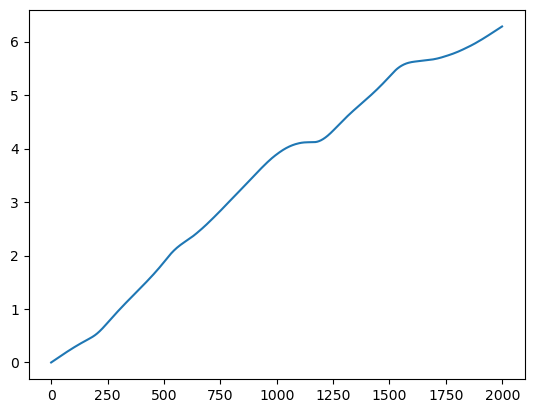

In [21]:
plt.plot(arclength_normalized)

In [22]:
# Prepend the first distance to match the original number of time steps (since np.diff reduces length by 1)
velocity = np.concatenate(([distances[0]], distances))

# Scale the velocity values to reduce step size during prediction
# (this helps prevent large jumps when integrating over time)
velocity_scaled = velocity / 15  # Choose a divisor between 10–20 based on testing



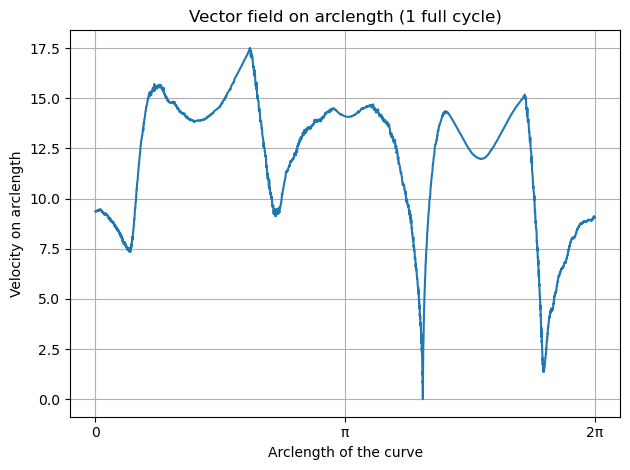

In [23]:
# Plot the estimated velocity along the normalized arclength
plt.plot(arclength_normalized, velocity)
plt.xlabel("Arclength of the curve")
plt.ylabel("Velocity on arclength")
plt.title("Vector field on arclength (1 full cycle)")

# Customize the x-axis ticks to show 0, π, and 2π for better interpretability
plt.xticks(
    [0, np.pi, 2 * np.pi],
    ["0", "π", "2π"]
)

# Add grid and layout formatting
plt.grid(True)
plt.tight_layout()
plt.show()


## PART 4

In [24]:
# Initialize an RBF (Radial Basis Function) approximator model
# L: number of basis functions (RBF centers)
# eps: spread parameter that controls the width of each RBF
vel_model = RBFApproximator(L=300, eps=0.5)

# Fit the RBF model to the velocity field on the normalized arclength
# Reshape inputs to be 2D arrays as expected by the model interface
vel_model.fit(arclength_normalized.reshape(-1, 1), velocity_scaled.reshape(-1, 1))

RBFApproximator(rcond=0.0, _weights=array([[-5.35410288e+10],
       [-4.33060167e+11],
       [-6.06288740e+11],
       [-2.16853499e+12],
       [-8.95766338e+11],
       [ 1.11299769e+12],
       [ 1.06627681e+12],
       [ 2.07247032e+11],
       [ 4.39146677e+11],
       [ 4.49769108e+11],
       [ 4.95419275e+10],
       [ 1.05934193e+12],
       [ 6.02855876e+11],
       [-1.50592375e+10],
       [ 4.35517010e+11],
       [ 2.42638488e+11],
       [-3.41980074e+11],
       [ 4.87880431e+11],
       [-9.28434775e+10],
       [-1.63497897e+10],
       [ 1.80640671e+11],
       [ 1.52546210e+11],
       [-2.43515893e+11],
       [ 7.48351467e+11],
       [ 3.84346966e+09],
       [-7.67972227e+11],
       [-3.40719817e+11],
       [-1.07824960e+12],
       [-4.93208479e+11],
       [ 7.05448430e+11],
       [ 1.01067121e+12],
       [ 2.76085950e+12],
       [-2.37365472e+11],
       [ 6.44874932e+10],
       [-9.21419938e+11],
       [ 2.92049026e+11],
       [-2.06470306e+10],
  

In [25]:
# Set the integration time step (smaller values produce smoother trajectories)
dt = 0.005

# Define the total number of time steps to simulate (14 days × 2000 steps/day)
n_steps = 14 * 2000

# Initialize arc_pred with the last known point of the real trajectory
# This serves as the starting point for prediction
arc_pred = [arclength_normalized[-1]]

# Simulate the evolution of the system by integrating the velocity model over time
for _ in range(n_steps):
    # Wrap the input s to [0, 2π] since the curve is periodic
    s = np.array([[arc_pred[-1] % (2 * np.pi)]])
    
    # Predict the velocity at the current position s
    v = vel_model.predict(s)[0, 0]
    
    # Use Euler integration: s_{t+1} = s_t + dt * v(s_t)
    # Apply modulo 2π to stay within the periodic domain
    next_s = (arc_pred[-1] + dt * v) % (2 * np.pi)
    
    # Append the new value to the predicted arclength list
    arc_pred.append(next_s)

# Convert the prediction list to a NumPy array for further analysis or plotting
arc_pred = np.array(arc_pred)






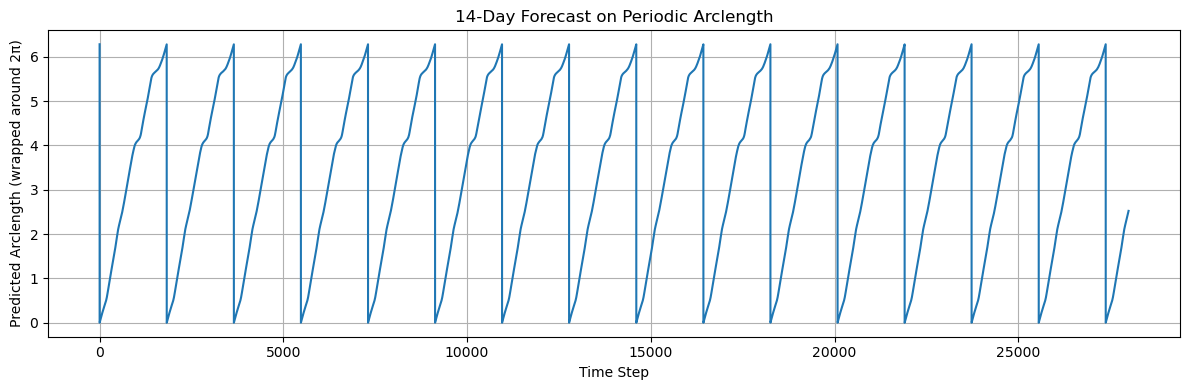

In [26]:
plt.figure(figsize=(12, 4))
plt.plot(arc_pred)
plt.xlabel("Time Step")
plt.ylabel("Predicted Arclength (wrapped around 2π)")
plt.title("14-Day Forecast on Periodic Arclength")
plt.grid(True)
plt.tight_layout()
plt.show()

In [27]:
# Initialize an RBF approximator to learn the usage pattern as a function of arclength
# L: number of basis functions (controls model complexity)
# eps: RBF width parameter (controls smoothness)
util_model = RBFApproximator(L=300, eps=0.3)

# Fit the model using known arclength values (normalized) and the corresponding usage values
# We assume sensor 0 corresponds to the MI building usage
util_model.fit(
    arclength_normalized.reshape(-1, 1),                 # input: normalized arclength
    data[:len(arclength_normalized), 0].reshape(-1, 1)   # target: MI usage
)

# Use the fitted model to predict MI usage over the predicted arclength values
# Flatten the result for easier plotting
util_pred = util_model.predict(arc_pred.reshape(-1, 1)).flatten()




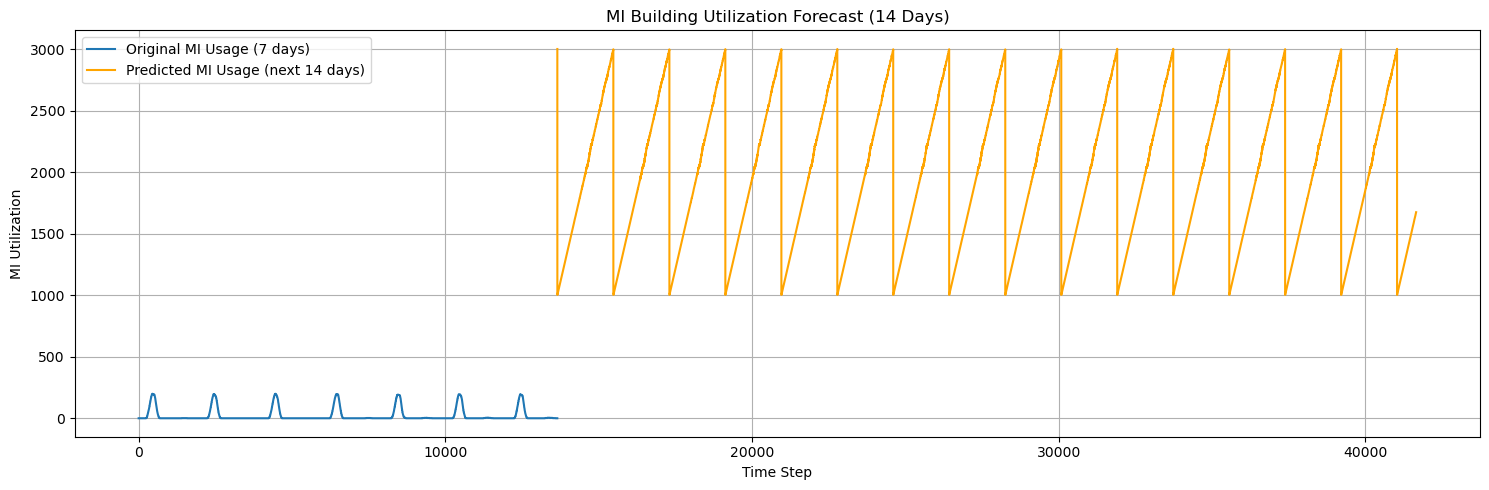

In [28]:
plt.figure(figsize=(15, 5))
plt.plot(observations[350:, 0], label="Original MI Usage (7 days)")
plt.plot(
    np.arange(len(observations[350:, 0]), len(observations[350:, 0]) + len(util_pred)),
    util_pred,
    label="Predicted MI Usage (next 14 days)",
    color="orange"
)
plt.xlabel("Time Step")
plt.ylabel("MI Utilization")
plt.title("MI Building Utilization Forecast (14 Days)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()